**Attribute Information:**
1. **name** - ASCII subject name and recording number
2. **mdvp_fo_hz** - Average vocal fundamental frequency (Actualy column name MDVP:Fo(Hz) )
3. **mdvp_fhi_hz** - Maximum vocal fundamental frequency (Actualy column name MDVP:Fhi(Hz) )
4. **mdvp_flo_hz** - Minimum vocal fundamental frequency (Actualy column name MDVP:Flo(Hz) )
5. **mdvp_jitter_in_percent, mdvp_jitter_abs, mdvp_rap, mdvp_ppq, jitter_ddp** - Several measures of variation in fundamental frequency (Actualy column names MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP respectively)
6. **mdvp_shimmer, mdvp_shimmer_db, shimmer_apq3, shimmer_apq5, mdvp_apq, shimmer_dda** - Several measures of variation in amplitude (Actualy column names MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA respectively)
7. **nhr, hnr** - Two measures of ratio of noise to tonal components in the voice (Actualy column names NHR, HNR respectively)
8. **rpde, d2** - Two nonlinear dynamical complexity measures (Actualy column names RPDE, D2 respectively)
9. **dfa** - Signal fractal scaling exponent (Actualy column name DFA )
10. **spread1, spread2, ppe** - Three nonlinear measures of fundamental frequency variation (Actualy column names spread1, spread2, PPE respectively)
11. **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy (**Target Varibale / attribute**)

In [ ]:
# Importing the necessary libraries
import numpy                            as np                        
import pandas                           as pd                        
import seaborn                          as sns                       
import matplotlib.pyplot                as plt                     
import warnings                                                   


%matplotlib inline                             
warnings.filterwarnings('ignore')                                   

import statsmodels.api                  as sm                      
from sklearn import model_selection                                  
from sklearn.model_selection            import train_test_split      

# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn import metrics                                          
from sklearn.metrics                    import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.linear_model               import LogisticRegression    
from sklearn.naive_bayes                import GaussianNB            
from sklearn.neighbors                  import KNeighborsClassifier  
from sklearn.svm                        import SVC                   


from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
pdDataOrg = pd.read_csv("Parkinsson disease.csv")
pdDataOrg.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
pdData = pdDataOrg.copy()                                               

targetCol = 'status'                                                    
targetColDf = pdData.pop(targetCol)                                     
pdData.insert(len(pdData.columns),targetCol, targetColDf)               

# deleting variables that were used for changing column position of target column
del targetCol 
del targetColDf

# converting column names into lower case
pdData.columns = [c.lower() for c in pdData.columns]
# replacing spaces in column names with '_'
pdData.columns = [c.replace(' ', '_') for c in pdData.columns]
# replacing ':' in column names with '_'
pdData.columns = [c.replace(':', '_') for c in pdData.columns]
# replacing '(' in column names with '_'
pdData.columns = [c.replace('(', '_') for c in pdData.columns]
# replacing ')' in column names with '' i.e blank
pdData.columns = [c.replace(')', '') for c in pdData.columns]
# replacing '%' in column names with 'in_percent'
pdData.columns = [c.replace('%', 'in_percent') for c in pdData.columns]

# to check the above printing top 5 rows
pdData.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [ ]:
print('\033[1mThe Parkinson\'s disease dataset having "{0}" rows and "{1}" columns\033[0m.'.format(pdData.shape[0],pdData.shape[1]))

The Parkinson's disease dataset having "195" rows and "24" columns.


In [ ]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [ ]:
# setting name column as index column
pdData.set_index('name',inplace=True)

In [ ]:
# after setting column 'name' as index now we have less columns to confirm that printing number of rows and column once again
print('\033[1mAfter setting \'name\' column as index of the Dataset,\033[0m now there are \033[1m"{0}"\033[0m Rows and \033[1m"{1}"\033[0m Columns in the given Dataset.'.format(pdData.shape[0],pdData.shape[1]))

After setting 'name' column as index of the Dataset, now there are "195" Rows and "23" Columns in the given Dataset.


In [ ]:
pdData.head()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [ ]:
# printing datatypes of each columns of the dataset

print("\033[1m*"*100)
print("a.\nColumn_Names        Data_Types")
print("*"*30)
print("\033[0m{0}\033[1m".format(pdData.dtypes))
print("*"*30)
print()

# printing No of Columns having different Types of Datatype

print("*"*100)
print("b.\nNumber of Columns with each DataTypes as follows :")
print("*"*50)
print("Column_Names     No_of_Columns\033[0m")
print("*"*30)
print(pdData.dtypes.value_counts())
print("\033[1m*"*30)
print("\033[0m")

# printing Different Column Names of the dataset

print("\033[1m*"*100)
print("c.\nEach Column Names of the dataset")
print("*"*80)
print("\033[0m{0}\033[1m".format(pdData.columns))
print("*"*80)
print("\033[0m")

****************************************************************************************************
a.
Column_Names        Data_Types
******************************
mdvp_fo_hz                float64
mdvp_fhi_hz               float64
mdvp_flo_hz               float64
mdvp_jitter_in_percent    float64
mdvp_jitter_abs           float64
mdvp_rap                  float64
mdvp_ppq                  float64
jitter_ddp                float64
mdvp_shimmer              float64
mdvp_shimmer_db           float64
shimmer_apq3              float64
shimmer_apq5              float64
mdvp_apq                  float64
shimmer_dda               float64
nhr                       float64
hnr                       float64
rpde                      float64
dfa                       float64
spread1                   float64
spread2                   float64
d2                        float64
ppe                       float64
status                      int64
dtype: object
******************************

******

**After observing the dataset and column description given we can conclude the followings:**
* **Columns having only two datatypes, int64, float64. (column 'name' was object datatype which was set as index of the dataframe)**
* **Column 'status' is only having int64 datatype, remaining all columns datatype is float64.** 
* **All columns except 'status' are Numeric column.**
* **Columns 'status' is Nominal Categorical column with binary response.**

In [ ]:
# checking missing values in dataset for each attributes / columns 

print("\033[1m*"*100)
print("Column_Name       No_of_Missing_Values")
print("*"*50)
print("\033[0m{0}".format(pdData.isnull().sum()))
print("\033[1m*"*50)
print()

# checking if any duplicate rows available in the dataset

print("*"*100)
print("Showing Duplicate rows if any in the dataset: ")
print("*"*50)
print("\033[0m{0}".format(pdData[pdData.duplicated()]))
print("\033[1m*"*100)
print("\033[0m")

****************************************************************************************************
Column_Name       No_of_Missing_Values
**************************************************
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64
**************************************************

****************************************************************************************************

**As shown above, <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a.) There are no missing values<br>and (b.) No duplicate rows in the given dataset**


In [ ]:
# Five point summary of each attribute
pdData.describe().T

,count,mean,std,min,25%,50%,75%,max
mdvp_fo_hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
mdvp_fhi_hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
mdvp_flo_hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
mdvp_jitter_in_percent,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
mdvp_jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
mdvp_rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
mdvp_ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
mdvp_shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
mdvp_shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [ ]:
# checking skewness of the data
pdData.skew().sort_values(ascending=False)

nhr                       4.220709
jitter_ddp                3.362058
mdvp_rap                  3.360708
mdvp_jitter_in_percent    3.084946
mdvp_ppq                  3.073892
mdvp_jitter_abs           2.649071
mdvp_apq                  2.618047
mdvp_fhi_hz               2.542146
mdvp_shimmer_db           1.999389
shimmer_apq5              1.798697
mdvp_shimmer              1.666480
shimmer_dda               1.580618
shimmer_apq3              1.580576
mdvp_flo_hz               1.217350
ppe                       0.797491
mdvp_fo_hz                0.591737
spread1                   0.432139
d2                        0.430384
spread2                   0.144430
dfa                      -0.033214
rpde                     -0.143402
hnr                      -0.514317
status                   -1.187727
dtype: float64

**As from above we understand the following:**
* Independent variables are measured in different units e.g. Hz, dB, % and absoulute etc i.e variation in units of data exists and gap between feature values extreamly high. Requires data scalling techniques to scale different quantities of measurements.
* Symmetrical distribution : Values close to 0
    MDVP:Fo(Hz)
    spread1
    spread2
    PPE
* Negative skewness and Tail is larger towards the left hand side of the distribution
    HNR
    status
    RPDE
    DFA
* Positive skewness and Tail is larger towards the Right hand side of the distribution All other attributes have a very high distribution towards right of the median

<Figure size 1000x500 with 0 Axes>

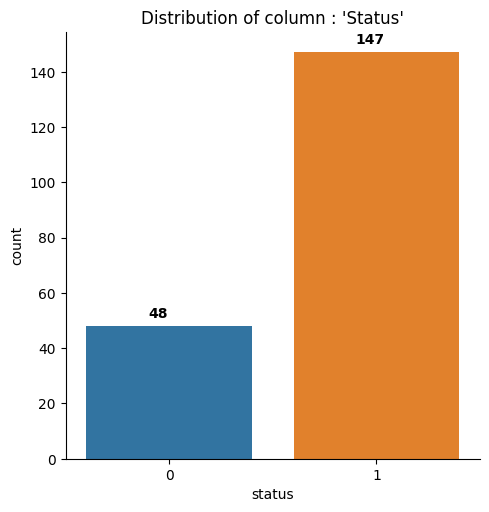

In [ ]:
plt.figure(figsize=(10,5))                                 # setting figure size with width = 10 and height = 5
# seaborn count catplot to examine distribution of the status
ax = sns.catplot(x='status', kind="count", data=pdData)
plt.title("Distribution of column : 'Status'")      # setting title of the figure
y = []                                                     # creating a null or empty array
for val in range(pdData.status.nunique()):        # looping for number of unique values in the status
    # appending count of each unique values from status to array y
    y.append(pdData.groupby(pdData.status,sort=False)['status'].count()[val])
for i, v in enumerate(y):                                  # looping count of each unique value in the status
    # including count of each unique values in the plot 
    plt.annotate(str(v), xy=(i,float(v)), xytext=(i-0.1, v+3), color='black', fontweight='bold')

Text(0.5, 1.0, "Distribution of column : 'status'")

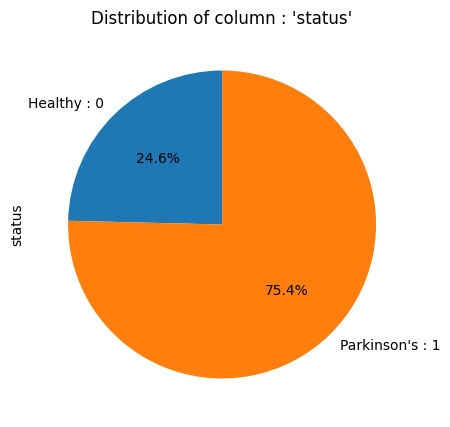

In [ ]:
plt.figure(figsize=(5,5))                               # setting figure size with width = 10 and height = 5
# seaborn pie chart to examine distribution of the status
pdData.groupby(['status']).status.count().plot(kind='pie',labels=['Healthy : 0','Parkinson\'s : 1'],
                                                               startangle=90, autopct='%1.1f%%')
plt.title("Distribution of column : 'status'")   # setting title of the figure

**From above we can see out of 195 patients, 48 patients (24.6 %) are healthy and 147 patients (75.4%) patients are having Parkinson's disease.**

In [ ]:
#Split the data into training and test set in the ratio of 70:30 respectively
X = pdData.drop(['status'],axis=1)
y = pdData['status']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# checking the dimensions of the train & test subset
# printing dimension of train set
print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

(136, 22)
(59, 22)


In [ ]:
X_train.drop(['mdvp_jitter_in_percent'],axis=1,inplace=True)
X_test.drop(['mdvp_jitter_in_percent'],axis=1,inplace=True)

In [ ]:
X_train.drop(['mdvp_shimmer'],axis=1,inplace=True)
X_test.drop(['mdvp_shimmer'],axis=1,inplace=True)

In [ ]:
X_train.drop(['hnr'],axis=1,inplace=True)
X_test.drop(['hnr'],axis=1,inplace=True)

In [ ]:
# printing dimension of train set
print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

(136, 19)
(59, 19)


In [ ]:
# Let us scale train as well as test data using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Train and Fit model
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

#predict status for X_test_scaled dataset 
lr_y_pred = lr.predict(X_test_scaled)

# Confusion Matrix for the Logistic Regression Model
print("Confusion Matrix : Logistic Regression")
print(confusion_matrix(y_test,lr_y_pred))

# Classification Report for the Logistic Regression Model
classRep = classification_report(y_test, lr_y_pred, digits=2)
print(classRep)

Confusion Matrix : Logistic Regression
[[ 9  4]
 [ 4 42]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.91      0.91      0.91        46

    accuracy                           0.86        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.86      0.86      0.86        59



**From the above Logistic Regression Model, we can find out the following details:**
* **Accuracy of the model:- 86%**
* **Re-call of the model:- 91%**
* **Precision of the model:- 91%**
* **F1-Score of the model:- 91%**

In [ ]:
# creating odd list of K for KNN
myList = list(range(3,40,2))

# creating empty list for F1 scores od different value of K
f1ScoreList = []

# perform accuracy metrics for values from 3,5....29
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate F1 Score
    f1Score = f1_score(y_test, y_pred)
    f1ScoreList.append(f1Score)

# changing to misclassification error
MSE = [1 - x for x in f1ScoreList]

# determining best k
bestk = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % bestk)

The optimal number of neighbors is 29


In [ ]:
# instantiate learning model (k = 29)
knn = KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
knn_y_pred = knn.predict(X_test_scaled)

# Confusion Matrix for the K-nearest neighbors Model
print("Confusion Matrix : K-nearest neighbors")
print(confusion_matrix(y_test,knn_y_pred))

# Classification Report for the K-nearest neighbors Model
classRep = classification_report(y_test, knn_y_pred, digits=2)
print(classRep)

Confusion Matrix : K-nearest neighbors
[[ 8  5]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.90      1.00      0.95        46

    accuracy                           0.92        59
   macro avg       0.95      0.81      0.86        59
weighted avg       0.92      0.92      0.91        59



**From the above K-nearest neighbors Model, we can find out the following details:**
* **Accuracy of the model:- 92%**
* **Re-call of the model:- 100%**
* **Precision of the model:- 90%**
* **F1-Score of the model:- 95%**

In [ ]:
svm = SVC(gamma=0.05, C=70,random_state=47)
svm.fit(X_train_scaled , y_train)

# predict the response
svm_y_pred = svm.predict(X_test_scaled)

# Confusion Matrix for the Support Vector Machine Model
print("Confusion Matrix : Support Vector Machine")
print(confusion_matrix(y_test,svm_y_pred))

# Classification Report for the Support Vector Machine Model
classRep = classification_report(y_test, svm_y_pred, digits=2)
print(classRep)

Confusion Matrix : Support Vector Machine
[[10  3]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        46

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



**From the above Support Vector Machine Model, we can find out the following details:**
* **Accuracy of the model:- 95%**
* **Re-call of the model:- 100%**
* **Precision of the model:- 94%**
* **F1-Score of the model:- 97%**

In [ ]:
#Using K fold to check how the above algorighms varies throughout the dataset with 10 different subset of equal bins
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=47)))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=70,random_state=47)))

# evaluate each model
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=47,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("\033[1m{0}\033[0m model have \033[1mmean F1-Score\033[0m of {1} and \033[1mSD F1-Score\033[0m of {2}".format(name, cv_results.mean(), cv_results.std()))

Logistic Regression model have mean F1-Score of 0.8930882775410977 and SD F1-Score of 0.05346316304648212
K-NN model have mean F1-Score of 0.8805069690035365 and SD F1-Score of 0.04633386023424363
SVM model have mean F1-Score of 0.9453975265995727 and SD F1-Score of 0.033233692576697435


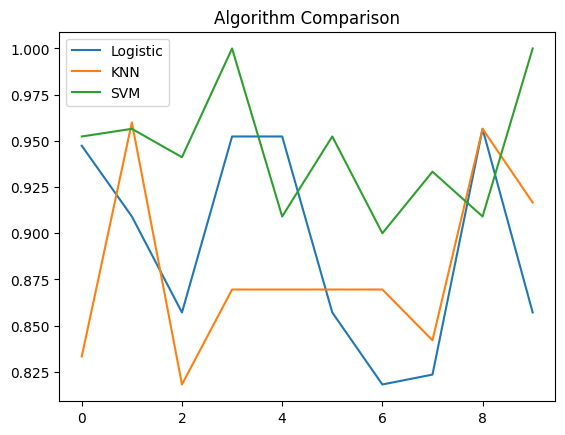

In [ ]:
plt.title('Algorithm Comparison')
plt.plot(results[0],label='Logistic')
plt.plot(results[1],label='KNN')
plt.plot(results[2],label='SVM')
plt.legend()

**From the above comparision of different algorithms (Logistic Regression, K-nearest neighbors and Support Vector Machine) we can conclude that SVM (Support Vector Machine) performed slightly better than other algorithms.**


In [ ]:
# defining level hetrogenious model
level0 = list()
level0.append(('lr', LogisticRegression(random_state=47)))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(gamma=0.05, C=70,random_state=47)))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = SVC(gamma=0.05, C=3,random_state=47)

# define the stacking ensemble with cross validation of 5
Stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# predict the response
Stack_model.fit(X_train_scaled, y_train)
prediction_Stack = Stack_model.predict(X_test_scaled)

# Confusion Matrix for the Stacking Model
print("Confusion Matrix : Stacking")
print(confusion_matrix(y_test,prediction_Stack))

# Classification Report for the Stacking Model
print(classification_report(y_test, prediction_Stack, digits=2))

Confusion Matrix : Stacking
[[10  3]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        46

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



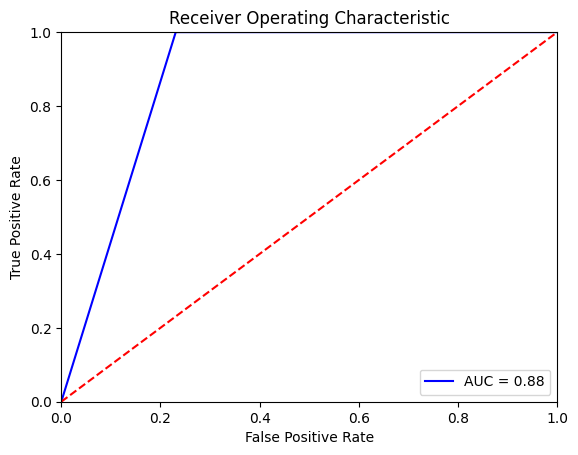

In [ ]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction_Stack)
roc_auc_stack = metrics.auc(fpr, tpr)

#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_stack)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**From the above Stacked meta classifier Model, we can find out the following details:**
* **Accuracy of the model:- 95%**
* **Re-call of the model:- 100%**
* **Precision of the model:- 94%**
* **F1-Score of the model:- 97%**
* **ROC-AUC : 88%**


In [ ]:
#creating model of Random Forest
RandomForest = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10,random_state=47)
RandomForest = RandomForest.fit(X_train_scaled, y_train)

# predict the response
RandomForest_pred = RandomForest.predict(X_test_scaled)

# Confusion Matrix for the Random Forest Model
print("Confusion Matrix : Random Forest")
print(confusion_matrix(y_test,RandomForest_pred))

# Classification Report for the Randome Forest Model
print(classification_report(y_test, RandomForest_pred, digits=2))

Confusion Matrix : Random Forest
[[ 9  4]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.92      0.98      0.95        46

    accuracy                           0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59



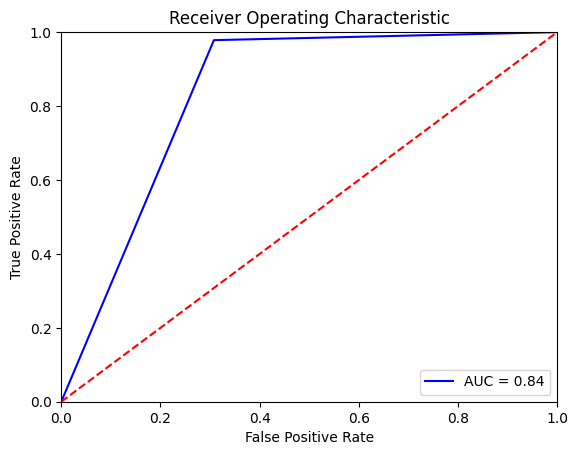

In [ ]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, RandomForest_pred)
roc_auc_rf = metrics.auc(fpr, tpr)

#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**From the above Random Forest Model, we can find out the following details:**
* **Accuracy of the model:- 92%**
* **Re-call of the model:- 98%**
* **Precision of the model:- 92%**
* **F1-Score of the model:- 95%**
* **ROC-AUC : 84%**


In [ ]:
# Lets check features importance
feature_imp = pd.Series(RandomForest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

ppe                0.212646
spread1            0.181815
mdvp_fo_hz         0.078539
mdvp_apq           0.066849
mdvp_fhi_hz        0.053630
nhr                0.048251
jitter_ddp         0.044719
spread2            0.044320
mdvp_rap           0.041004
mdvp_flo_hz        0.036010
rpde               0.029126
dfa                0.028516
mdvp_jitter_abs    0.028306
d2                 0.025957
shimmer_dda        0.022860
mdvp_ppq           0.020985
shimmer_apq3       0.012780
mdvp_shimmer_db    0.012384
shimmer_apq5       0.011302
dtype: float64

Text(0, 0.5, 'Features')

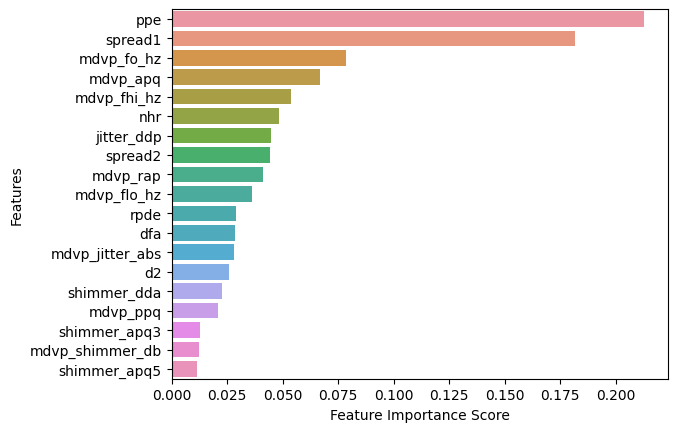

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [ ]:
#creating model of Adaptive Boosting
AdBs = AdaBoostClassifier( n_estimators= 50)
AdBs  = AdBs.fit(X_train_scaled, y_train)

# predict the response
AdBs_y_pred = AdBs.predict(X_test_scaled)

# Confusion Matrix for the Adaptive Boosting Model
print("Confusion Matrix : Adaptive Boosting")
print(confusion_matrix(y_test,AdBs_y_pred))

# Classification Report for the Adaptive Boosting Model
print(classification_report(y_test, AdBs_y_pred, digits=2))

Confusion Matrix : Adaptive Boosting
[[ 9  4]
 [ 2 44]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

    accuracy                           0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59



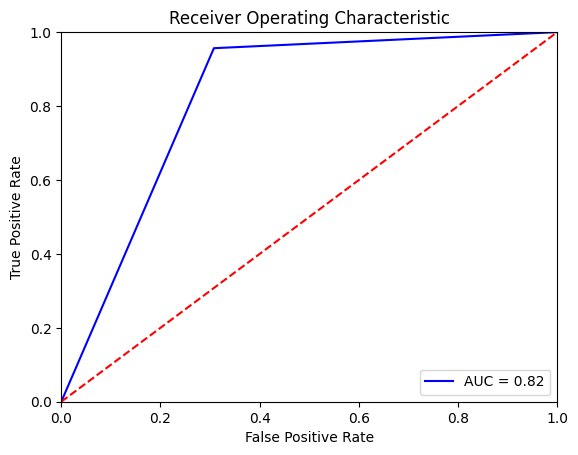

In [ ]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, AdBs_y_pred)
roc_auc_ada = metrics.auc(fpr, tpr)

#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**From the above Adaptive Boosting Model, we can find out the following details:**
* **Accuracy of the model:- 90%**
* **Re-call of the model:- 96%**
* **Precision of the model:- 92%**
* **F1-Score of the model:- 94%**
* **ROC-AUC : 82%**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [ ]:
# Train the model
from xgboost import XGBClassifier


model=XGBClassifier()
model.fit(X_train,y_train)
predict=model.predict(X_test)

print(accuracy_score(y_test,predict)*100)

# Confusion Matrix for the XGBoosting Model
print("Confusion Matrix : XGBoosting")
print(confusion_matrix(y_test,predict))

# Classification Report for the XGBoosting Model
print(classification_report(y_test, predict, digits=2))

97.43589743589743
Confusion Matrix : XGBoosting
[[ 7  1]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.97      1.00      0.98        31

    accuracy                           0.97        39
   macro avg       0.98      0.94      0.96        39
weighted avg       0.98      0.97      0.97        39



Text(0.5, 1.0, 'Output Confusion Matrix')

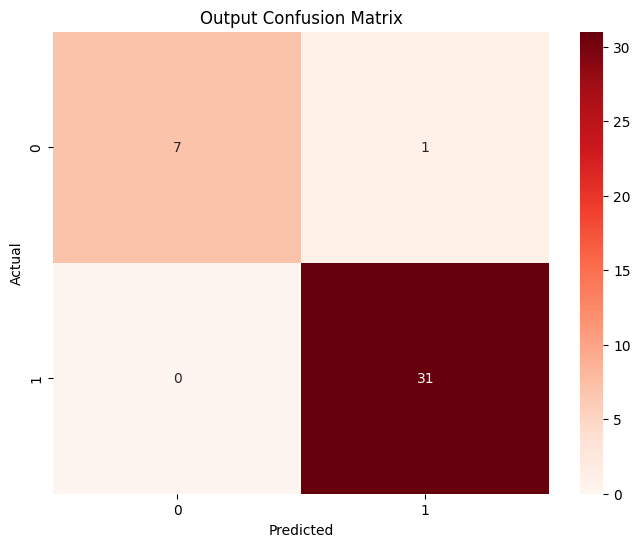

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

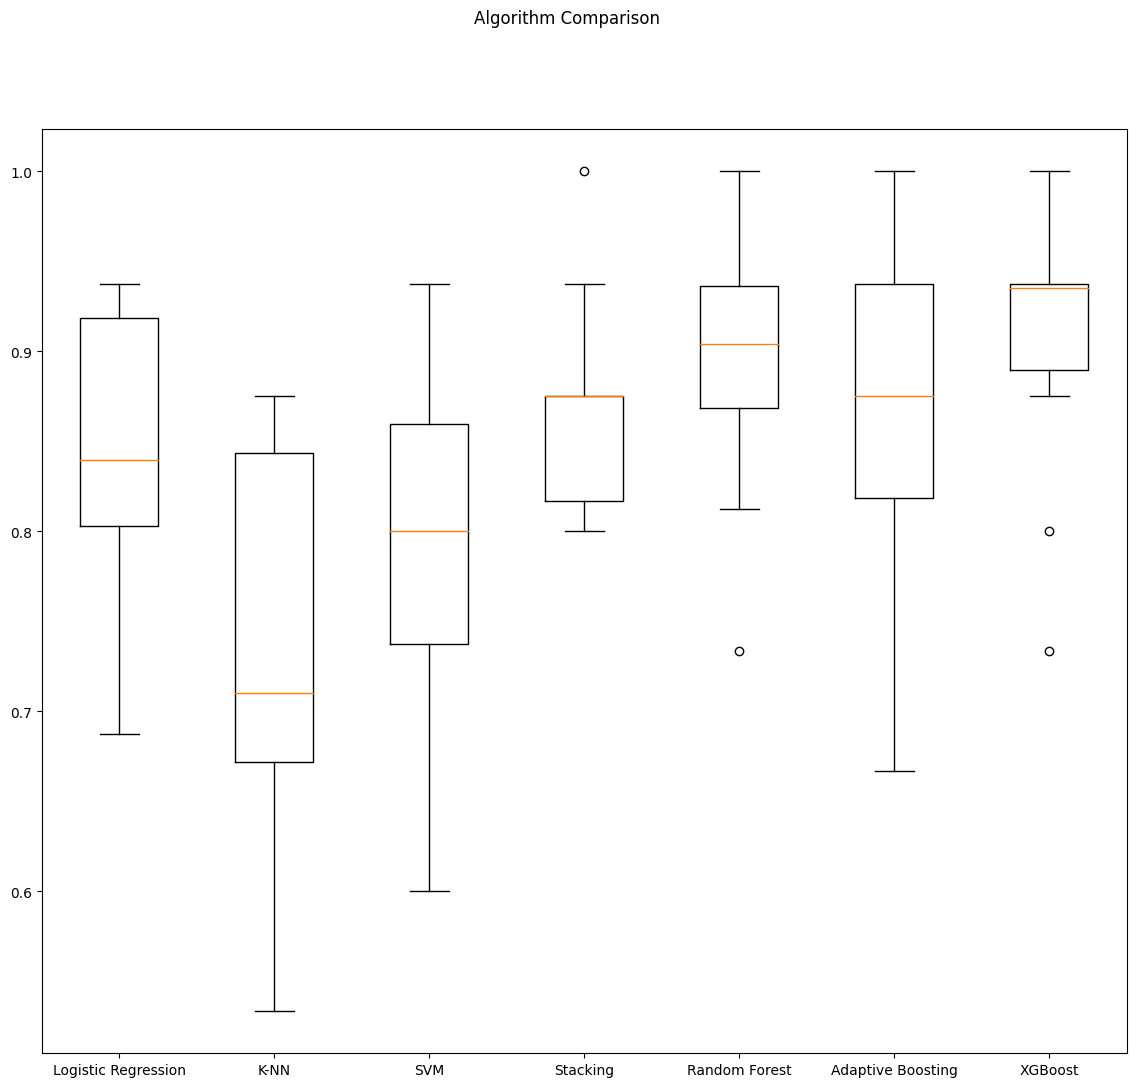

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# The baseline

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=47)))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=70,random_state=47)))
models.append(('Stacking', StackingClassifier(estimators=level0, final_estimator=level1, cv=5)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10,random_state=47)))
models.append(('Adaptive Boosting', AdaBoostClassifier( n_estimators= 50)))
models.append(('XGBoost',XGBClassifier()))

def eval_algorithms(models, show_boxplots=True):
    # Evaluate each model in turn
    # Setup the test harness to use 10-fold cross validation
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("Estimated accuracy of {} with the mean of {} and std. dev. {}".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        #print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        
    if show_boxplots:
        # Create a plot of the model evaluation results to compae the spread 
        # and the estimated mean accuracy of each model
        fig = plt.figure(figsize=(14,12)) 
        fig.suptitle('Algorithm Comparison') 
        ax = fig.add_subplot(111) 
        plt.boxplot(results) 
        ax.set_xticklabels(names) 
        plt.show()
        
eval_algorithms(models)